**Necessary Imports**
--

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-27 19:18:29.505262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 19:18:29.505359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 19:18:29.622195: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Dataset**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Splitting the Training and Validation Sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Optimizers for Deep Learning**
--

## Helper Function to build the Model Architecture


In [4]:
def build_model(seed=1730):
    
    # Applying the Unique Random State
    tf.random.set_seed(seed)
    
    # Returning the Model Architecture
    return tf.keras.models.Sequential([
        
        # Input Layers
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        
        # Normalisation Layer
        tf.keras.layers.BatchNormalization(),
        
        # Deep Layers
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(10, activation="softmax")
    ])

## Helper Function to compile and train the model

In [5]:
def compile_and_train_model(optimizer):
    
    # Using the above helper function to build the model first
    model = build_model()
    
    # Compiling the model using the optimiser parameter
    model.compile(
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
        optimizer=optimizer
    )
    
    # Returning the Trained Model and the History Object
    return model.fit(
        X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
    )

**Testing the Functions**

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
history_sgd = compile_and_train_model(optimizer)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
  83/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1267 - loss: 2.8002

I0000 00:00:1714245526.777628      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4854 - loss: 1.5579 - val_accuracy: 0.7550 - val_loss: 0.7077
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7484 - loss: 0.7410 - val_accuracy: 0.7960 - val_loss: 0.5913
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7808 - loss: 0.6313 - val_accuracy: 0.8104 - val_loss: 0.5381
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7982 - loss: 0.5754 - val_accuracy: 0.8200 - val_loss: 0.5061
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8103 - loss: 0.5384 - val_accuracy: 0.8264 - val_loss: 0.4836
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8197 - loss: 0.5108 - val_accuracy: 0.8310 - val_loss: 0.4669
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8270 - loss: 0.4889 - val_accuracy: 0.8338 - val_loss: 0.4536
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8345 - loss: 0.4706 - val_accurac

**The Gradient Descent Algorithm**
--

- Update Equations
$$w \, = \, w \, - \, \alpha \, dw$$
$$b \, = \, b \, - \, \alpha \, db$$
- Where $\alpha$ is the learning rate
- The following updates were carried untill the difference between loss functions calculated during backpropagation were smaller than a preset small value $\epsilon$

### Problems with Gradient Descent
- Though gradient descent was one of the first algorithms used for backpropagation in neural networks it wasnt optimal.
    - It was inefficient in propagating through Local Minima and Plateaus during the training of a deep learning model.
    - It was also very sensitive to changes made to the learning rate hyperparameter ($\alpha$ or $\eta$).
    - Thus for larger values of learning rate the model would risk converging while for smaller values of learning rate the model took very slow incremental steps to achieve convergance.
    
**Thus alternate optimization algorithms were developed to address the pitfalls of Gradient Descent while being more efficient through the backpropagation process**


**Escaping Local Minima Using Exponentially Weighted Averages**
--

- Exponentially Weighted Averages were considered while training in advanced (modern) optimization techniques such as:
    - RMSprop
    - Adam
    - AdaGrad
    - Nadam

**Working with Exponentially Weighted Averages**
--

- **`General Formula`**:
$$V_t \; = \; \beta \; V_{t-1} \; + \; (1 \; - \; \beta) X_t $$

- Here:
    - $V_t$ is the exponential moving average calculated for the **`current iteration / observation.`**
    - $V_{t-1}$ is the exponential moving average calculated for the **`previous iteration / observation.`**
    - $\beta$ is the **`momentum hyperparameter`** used to create the weighted average between the present and the past.
    - $X_t$ is the value of the **`current observation`** before being adjusted by the exponential moving average.


- On using Exponentially Weighted Averages for a **`large set of observations / no of iterations`** we can approximate the value of a any obeservation $V_t$ as follow:
$$V_t \; = \; (1 \; - \; \beta) \; X_t $$

- Where $(1 \; - \; \beta)$ can be substituted for as follows for **`smaller values of`** $\beta$:
$$(1 - \beta) \; \approx \; \left(\frac{1}{1 \; + \; \beta}\right)$$

**Important**
- Setting a correct value for $\beta$ is pivotal for the optimal working of an exponential moving average.
- **`Higher values`** of $\beta$ create a moving average that is **`less susceptible`** to changes in trends of observations.
- On contrast **`Lower values`** of $\beta$ create a moving average that is **`more dynamic and responsive`** to change in trends of observations.
- Thus the value of $\beta$ creates the balance between weightage given for past and present observations while calculating a moving average.
- Lastly $\beta$ **`decays exponentially overtime`** due to the chain of multiplication operations:
- Assuming $\beta$ is 0.9:
$$V_{10} \; = \; 0.1X_{10} \; + \; (0.1)(0.9)X_9 \; + \; (0.1)(0.9)^2X_8 \; + \; (0.1)(0.9)^3X_7 \; + \; 0.9^4(0.1X_6 \; + \; 0.9 \; V_5) \; + \; ...$$
- This retains the intuition that previous observations are still being used in calculation of new observations however the **`window is shifting / moving more towards newer observations`**.

- Ex:
    - When $\beta$ is $0.9$ using the above approximation:
    $$V_t \; = \; 10 \; * \; X_t \; + \; \beta \; V_{t-1}$$
    - Thus intuitively the moving average of the last 10 observations is being considered while calculating the moving average for the current obeservation.
    
    - When $\beta$ is $0.5$ using the above approximation:
    $$V_t \; = \; 2 \; * \; X_t \; + \; \beta \; V_{t-1}$$
    - Thus intuitively the moving average of the last 2 observations is being considered while calculating the moving average for the current obeservation.
    

**Working with Momentum Optimization**
--

- The Momentum Optimization Algorithm took a step ahead from Gradient Descent.
- It incorporated the previously calulated gradients to ensure the model doesnt get stuck at any Local Minima.
- It also incorporated Exponentially Weighted Averages during the optimization process for better appoximations of the model.

## Update Equations when Backpropagating using Gradient Descent with Momentum

$$Vdw \; = \; \beta \; Vdw \; + \; (1 \; - \; \beta) \; dw$$
$$Vdb \; = \; \beta \; Vdb \; + \; (1 \; - \; \beta) \; db$$

- Notation:
    - Vdw is the gradient from the previous epochs of training.
    - dw is the gradient from the current epoch of training.
    - $\beta$ is the momentum hyperparameter


- Each of the above equations follow the same idea as the Exponential Weighted Averages above given by:
$$V_t \; = \; \beta \; V_{t-1} \; + \; (1 \; - \; \beta) \; X_t$$

- The calulated values of Vdw and Vdb at the final epoch of training are then substituted into:
$$w \; = \; w \; - \; \alpha Vdw$$
$$b \; = \; b \; - \; \alpha Vdb$$

**Important**
- Since the model now considers the previous values of gradients while training it can take much larger steps during training while escaping plateaus and local minima's.

In [7]:
# Momentum Optimization can applied as follows in Keras
optimizer = tf.keras.optimizers.SGD(
    learning_rate=1e-3, 
    momentum=0.9
)

history_momentum = compile_and_train_model(
    optimizer
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7066 - loss: 0.8827 - val_accuracy: 0.8438 - val_loss: 0.4303
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8363 - loss: 0.4546 - val_accuracy: 0.8540 - val_loss: 0.3995
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8599 - loss: 0.3901 - val_accuracy: 0.8600 - val_loss: 0.3874
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8756 - loss: 0.3477 - val_accuracy: 0.8608 - val_loss: 0.3813
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8888 - loss: 0.3157 - val_accuracy: 0.8640 - val_loss: 0.3798
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8996 - loss: 0.2882 - val_accuracy: 0.8632 - val_loss: 0.3805
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9083 - loss: 0.2637 - val_accuracy: 0.8630 - val_loss: 0.3830
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2411 - 

**Utilising the Nesterov Accelerated Gradient**
--

- The Nesterov Momentum Optimisation method or the Nesterov Accelerated Gradient applies a significant mathematical manipulation to the above Momentum Algorithm.
- It applies the momentum step before taking the gradient for the current epoch.

$$m \; \leftarrow \; \beta m \; - \; \alpha \; \nabla_w \; J(W \; + \; \beta m) $$

- The updated paramter matrix with the momentum gradient is then used to accelerated the training process
$$W \; \leftarrow \; W \; + \; m$$

- Where:
    - m: Previous Weights (parameters)
    - $\alpha$: Learning Rate
    - $\beta$: Momentum
    - J: Cost Function
    - W: Actual Weights before update for the current iteration


- The Nesterov techniques moves the location of the cost function J from its initial position W to a global optimum pointing in that direction using W + $\beta w$.
- The following small update provides a significant performance gains when training for longer epochs on comparison with regular optimisation algorithms.

In [8]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=1e-3,
    momentum=0.9,
    nesterov=True
)

history_nesterov = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7093 - loss: 0.8655 - val_accuracy: 0.8432 - val_loss: 0.4202
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8390 - loss: 0.4509 - val_accuracy: 0.8566 - val_loss: 0.3868
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8606 - loss: 0.3872 - val_accuracy: 0.8580 - val_loss: 0.3762
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3466 - val_accuracy: 0.8618 - val_loss: 0.3727
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8872 - loss: 0.3145 - val_accuracy: 0.8634 - val_loss: 0.3759
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8993 - loss: 0.2873 - val_accuracy: 0.8656 - val_loss: 0.3803
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.2632 - val_accuracy: 0.8662 - val_loss: 0.3857
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9156 - loss: 0.2411 - 

**Root Mean Squared Propagation Algorithm (RMS Prop)**
--

- The RMS Prop Algorithm takes a step forward from the **`Gradient Descent with Momentum Algorithm`** by further addressing its issues.
- The Momentum algorithm utilised **`all the previously calculated gradients`** while calculating the updated values of the parameters this made the algorithm **`prone to being slow`** on longer training sessions.
- The **`RMS Prop Algorithm applied an exponential decay`** on the momentum step to increase the speed of calculation by only considering a controlled number of recently calculated gradients.

## Update Equations for the RMS Propagation

$$Sdw \; = \; \beta \; Sdw \; + \; (1 \; - \; \beta) \; dw^2$$
$$Sdb \; = \; \beta \; Sdb \; + \; (1 \; - \; \beta) \; db^2$$

- Notation:
    - Sdw: is the gradient from previous epochs of training
    - $\beta$: is the momentum hyperparameter enforcing the exponential decay (decay rate)
    - dw: is the gradient from the current epoch of training
    - $dw^2$: is taken element-wise for each element in the matrix
    - Sdb and db are used to make similar references as Sdw and dw
    

- While the above equations calculate the Squared Exponentially Weighted Moving Average they draw inspiration from the idea of Exponentially Weighted Moving Averages:
$$V_t \; = \; \beta \; V_{t-1} \; + \; (1 \; - \; \beta) \; X_t$$

- The calculated values of Sdw and Sdb are then used to update the parameter matrices for the given epoch of training as follows:
$$w \; = \; w \; - \; \alpha \; \frac{dw}{\sqrt{Sdw \; + \; \epsilon}}$$
$$b \; = \; b \; - \; \alpha \; \frac{db}{\sqrt{Sdb \; + \; \epsilon}}$$

- Here: $\epsilon$ is a small value used to prevent Zero Division
    
**Important**
- The values of $dw^2$ generally tend to decrease overtime since they are initialised as floating point numbers.
- Thus overtime the update equation of Sdw would make Horizontal Progress (X-Axis, along dw) due to smaller values of $dw^2$.
- The values of $db^2$ generally tend to increase overtime since they are initialised as integers.
- Thus overtime the update equation of Sdb would make Vertical Progress (Y-Axis, along db) due to smaller values of Sdb.

In [9]:
# Here Rho corresponds to beta the Momentum Parameter
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=1e-3,
    rho=0.9
)

history_rms = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7720 - loss: 0.6524 - val_accuracy: 0.8564 - val_loss: 0.3824
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8557 - loss: 0.4026 - val_accuracy: 0.8696 - val_loss: 0.3587
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.3410 - val_accuracy: 0.8772 - val_loss: 0.3439
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8927 - loss: 0.2997 - val_accuracy: 0.8762 - val_loss: 0.3495
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.2689 - val_accuracy: 0.8820 - val_loss: 0.3516
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.2429 - val_accuracy: 0.8806 - val_loss: 0.3558
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9200 - loss: 0.2233 - val_accuracy: 0.8776 - val_loss: 0.3864
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9285 - loss: 0.2018 - 

**Adaptive Moment Estimation Algorithm (Adam Optimization)**
--

- It combines the ideas of Momentum Optimization and RMS Prop Optimization algorithms.
- It utilises the idea of `Momentum Optimization` to make estimations of the **`First Moment: Mean`**
- It then utilises the idea of `RMS Prop` to make estimations of the **`Second Moment: Variance (Uncentered)`**

## Update Equations of the Adam Optimization Algorithm
- **Momentum Weighted Average**
$$Vdw \; = \; \beta_1 \; Vdw \; + \; (1 \; - \; \beta_1) \; dw$$
$$Vdb \; = \; \beta_1 \; Vdb \; + \; (1 \; - \; \beta_1) \; db$$

- **RMS Prop Weighted Average**
$$Sdw \; = \; \beta_2 \; Sdw \; + \; (1 \; - \; \beta_2) \; dw^2$$
$$Sdb \; = \; \beta_2 \; Sdb \; + \; (1 \; - \; \beta_2) \; db^2$$

- *Here $\beta_1 \; and \; \beta_2$ are hyperparameters for Momentum and RMS Prop respectively*
- Since each of the above gradients is initialised to 0, during the initial epochs of the training process the `estimates of First and Second Moments are biased towards 0`.
- Thus they are hence corrected by the following updates:
- **First Moment Correction**
$$\widehat{V_{dw}} \; = \; \frac{Vdw}{1 \; - \; \beta_1^t}$$
$$\widehat{V_{db}} \; = \; \frac{Vdb}{1 \; - \; \beta_1^t}$$

- **Second Moment Correction**
$$\widehat{S_{dw}} \; = \; \frac{Sdw}{1 \; - \; \beta_2^t}$$
$$\widehat{S_{db}} \; = \; \frac{Sdb}{1 \; - \; \beta_2^t}$$

- The above mentioned corrections approximate to the original values with increasing values of t. Here t is the number of training epochs.
- The Corrected Values of the estimations are then substituted to update the parameter matrix as follows:
$$w \; = \; w \; - \; \alpha \; \frac{\widehat{V_{dw}}}{\sqrt{\widehat{S_{dw}} \; + \; \epsilon}}$$
$$b \; = \; b \; - \; \alpha \; \frac{\widehat{V_{db}}}{\sqrt{\widehat{S_{db}} \; + \; \epsilon}}$$


In [10]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3,
    beta_1=0.9,
    beta_2=0.999
)

history_adam = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7648 - loss: 0.6711 - val_accuracy: 0.8588 - val_loss: 0.3899
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8559 - loss: 0.4003 - val_accuracy: 0.8686 - val_loss: 0.3656
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3496 - val_accuracy: 0.8708 - val_loss: 0.3642
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8875 - loss: 0.3109 - val_accuracy: 0.8706 - val_loss: 0.3743
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8995 - loss: 0.2769 - val_accuracy: 0.8678 - val_loss: 0.3879
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9088 - loss: 0.2490 - val_accuracy: 0.8672 - val_loss: 0.4024
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9176 - loss: 0.2264 - val_accuracy: 0.8712 - val_loss: 0.3930
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9214 - loss: 0.2072 -

**Variants of the Adam Optimisation Algorithm**
--

- **AdaMax**: The AdaMax algorithm makes small modifications to the RMS Prop Average Calculation
$$S \; \leftarrow \; max(\beta_2 \; S, \; \nabla_W \; J(W))$$

In [11]:
optimizer = tf.keras.optimizers.Adamax(
    learning_rate=1e-3,
    beta_1=0.9,
    beta_2=0.999
)

history_adamax = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7273 - loss: 0.8086 - val_accuracy: 0.8484 - val_loss: 0.4093
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8444 - loss: 0.4302 - val_accuracy: 0.8610 - val_loss: 0.3755
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3537 - val_accuracy: 0.8658 - val_loss: 0.3615
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8897 - loss: 0.3067 - val_accuracy: 0.8684 - val_loss: 0.3592
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9039 - loss: 0.2692 - val_accuracy: 0.8702 - val_loss: 0.3644
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9170 - loss: 0.2370 - val_accuracy: 0.8690 - val_loss: 0.3782
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9270 - loss: 0.2092 - val_accuracy: 0.8752 - val_loss: 0.3868
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9371 - loss: 0.1842 -

- **Nadam**: The Nadam Algorithm Applies the Nesterov Gradient Manipulation while calculating the Gradients before applying the gradients in the First Moment and Second Moment Calculation
$$g_t \; = \; \beta_1 \; g_{t-1} \; + \; (1 \; - \; \beta_1) \; g_t$$

- Where $g_t$ is any gradient dw or db

In [12]:
optimizer = tf.keras.optimizers.Nadam(
    learning_rate=1e-3,
    beta_1=0.9,
    beta_2=0.999
)

history_nadam = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7580 - loss: 0.6991 - val_accuracy: 0.8580 - val_loss: 0.3823
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8560 - loss: 0.3974 - val_accuracy: 0.8670 - val_loss: 0.3659
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8756 - loss: 0.3440 - val_accuracy: 0.8682 - val_loss: 0.3722
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8881 - loss: 0.3061 - val_accuracy: 0.8676 - val_loss: 0.3644
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8991 - loss: 0.2731 - val_accuracy: 0.8670 - val_loss: 0.3763
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9101 - loss: 0.2468 - val_accuracy: 0.8680 - val_loss: 0.3733
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9187 - loss: 0.2213 - val_accuracy: 0.8722 - val_loss: 0.3878
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9252 - loss: 0.2010 -

**AdamW**: The AdamW Algorithm decouples the Time-Delayed Gradient Decay from the Time-Delay Weight Decay in the Adam Algorithm by providing an additional update to the parameters.
$$w \; = \; w \; - \; \alpha \; (\nabla J(w) \; + \; \lambda \; w)$$

In [13]:
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=1e-3,
    beta_1=0.9,
    beta_2=0.999,
    weight_decay=1e-5
)

history_adamw = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7620 - loss: 0.6842 - val_accuracy: 0.8598 - val_loss: 0.3936
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8543 - loss: 0.4022 - val_accuracy: 0.8668 - val_loss: 0.3718
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8751 - loss: 0.3446 - val_accuracy: 0.8704 - val_loss: 0.3626
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8884 - loss: 0.3042 - val_accuracy: 0.8684 - val_loss: 0.3567
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9009 - loss: 0.2726 - val_accuracy: 0.8678 - val_loss: 0.3664
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9095 - loss: 0.2451 - val_accuracy: 0.8672 - val_loss: 0.3854
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9147 - loss: 0.2272 - val_accuracy: 0.8704 - val_loss: 0.3876
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9236 - loss: 0.2044 -

**Visualising the Learning Curves of all the Optimization Algorithms**
--

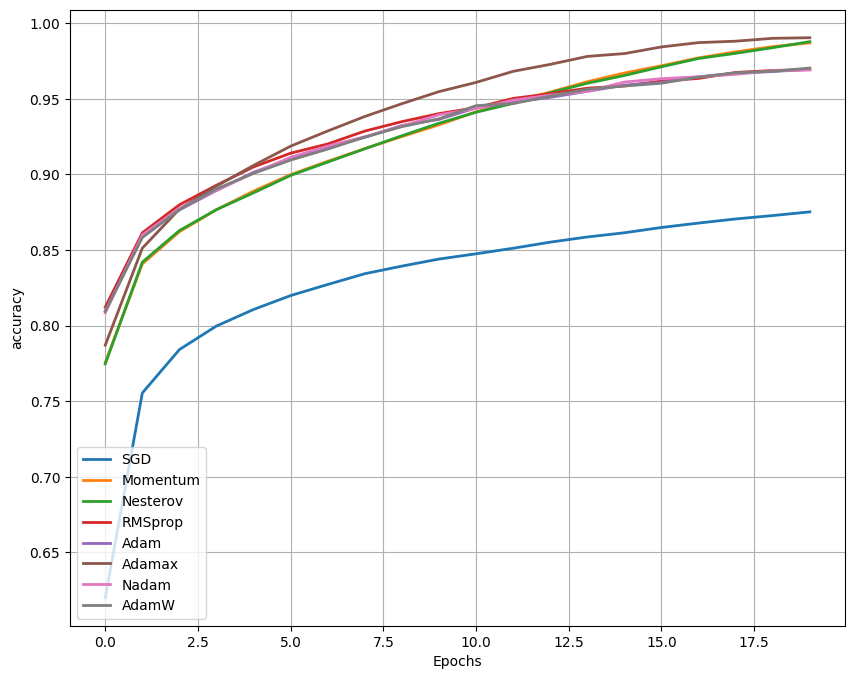

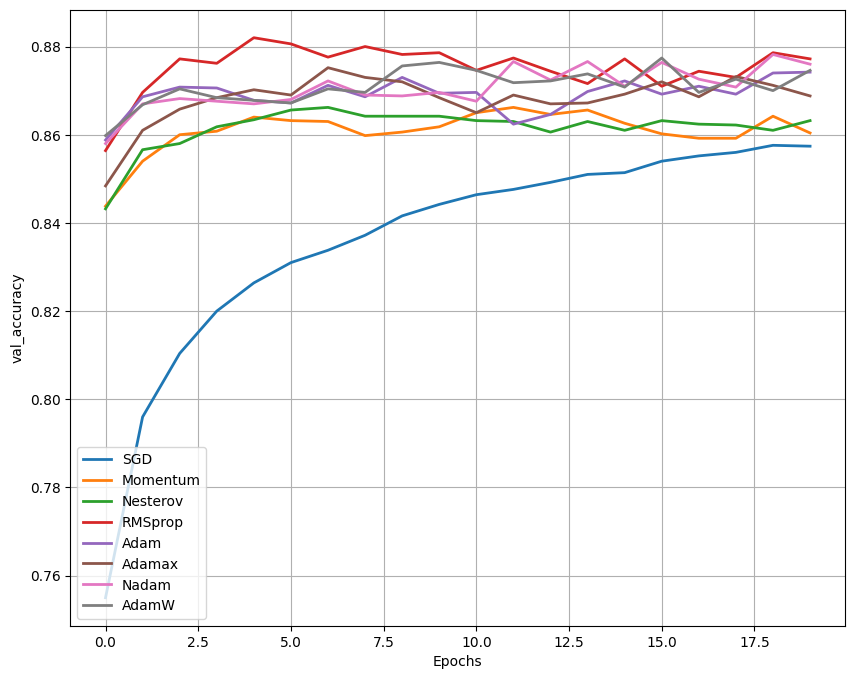

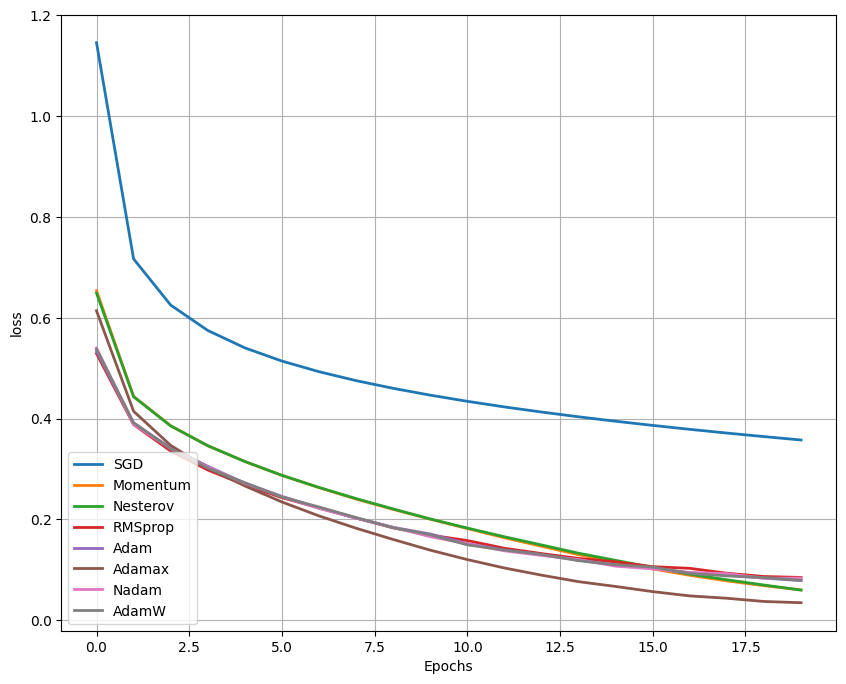

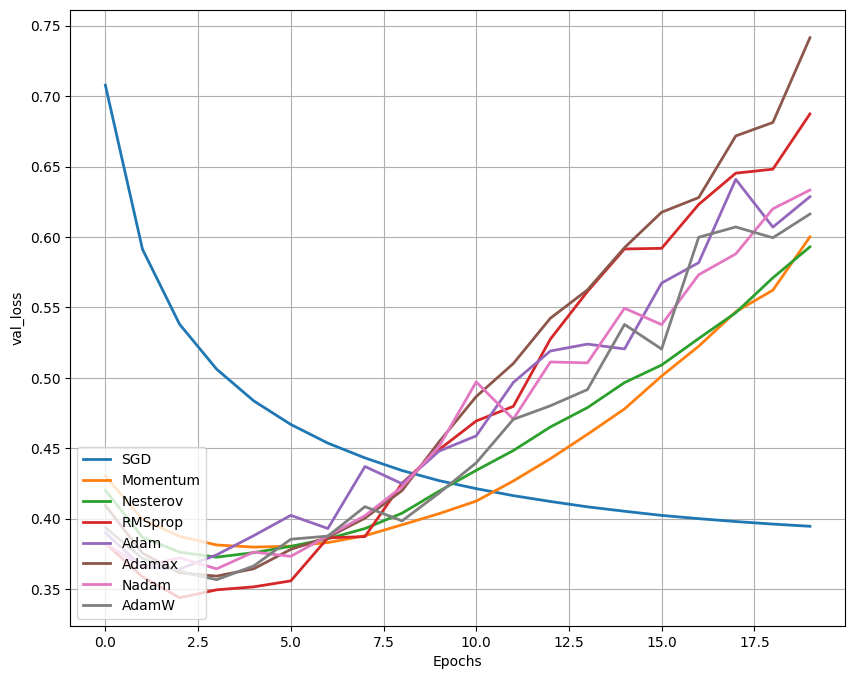

In [14]:
for metric in ("accuracy", "val_accuracy", "loss", "val_loss"):
    plt.figure(figsize=(10, 8))
    optimizers = "SGD Momentum Nesterov RMSprop Adam Adamax Nadam AdamW"
    optimizer_history = (history_sgd, history_momentum, history_nesterov, history_rms, history_adam, 
                         history_adamax, history_nadam, history_adamw)
    
    for optimizer, history in zip(optimizers.split(), optimizer_history):
        plt.plot(history.history[metric], label=f"{optimizer}", linewidth=2)
    
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric}")
    plt.legend(loc="lower left")
    plt.show()

**Learning Rate Scheduling for Optimization of Deep Neural Networks**
--

## Utilising Power Scheduling

- The power scheduling approach to learning rate tuning paved the way for the usage of Exponential Decay in the learning rate scheduling.
- Power scheduling could be implemented as follows
$$\alpha \; = \; \frac{\alpha_0}{1 \; + \; Decay \, Rate \; * \; Steps}$$

$$Steps \; = \; \frac{Training \; Set \; Size}{Batch \; Size}$$

- Here:
    - $\alpha_0$ is the initial learning rate set before the training process
    - Decay Rate is set to 1 by default
    
    
- Alternate Version of the Formula
$$\alpha \; = \; \frac{\alpha_0}{1 \; + \; Decay \, Rate \; * \; \frac{Steps}{Decay \, Steps}}$$

- Where: Decay Steps is used to further decrease the learning rate in a linearly.

In [15]:
# Stair Case parameter applies floor(Steps / Decay Steps)
lr_power_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=1e-2,
    decay_steps=10e4,
    decay_rate=1,
    staircase=False
)

# Applying the Schedule to the Learning Rate
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr_power_schedule
)

# Training the Model
history_power_scheduling = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7160 - loss: 0.8416 - val_accuracy: 0.8464 - val_loss: 0.4118
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8396 - loss: 0.4485 - val_accuracy: 0.8588 - val_loss: 0.3760
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8621 - loss: 0.3838 - val_accuracy: 0.8648 - val_loss: 0.3626
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3438 - val_accuracy: 0.8708 - val_loss: 0.3544
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8889 - loss: 0.3131 - val_accuracy: 0.8730 - val_loss: 0.3521
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.2870 - val_accuracy: 0.8732 - val_loss: 0.3515
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9080 - loss: 0.2642 - val_accuracy: 0.8718 - val_loss: 0.3561
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.2430 - 

## Viewing the Power Scheduling of Learning Rate with and without the Staircase

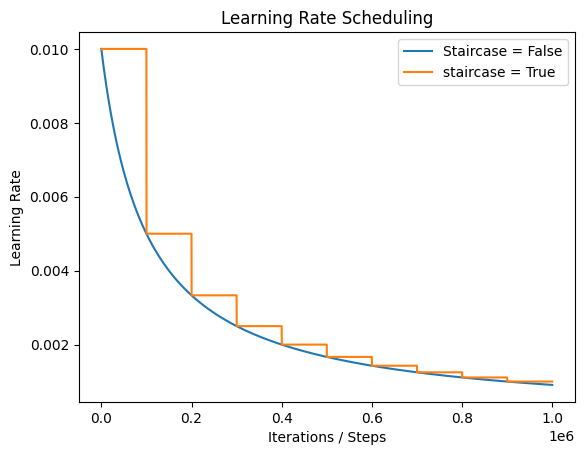

In [16]:
# Initial Parameters
initial_learning_rate = 1e-2
decay_rate = 1.0
decay_steps = 10e4

# X - Axis of the Graph
steps = np.arange(10e5)

# Values of the Learning Rate
lr = initial_learning_rate / (1 + decay_rate * (steps / decay_steps))
lr_with_steps = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

# Plotting the Chart
plt.plot(steps, lr, "-", label="Staircase = False")
plt.plot(steps, lr_with_steps, "-", label="staircase = True")

# Plot Anatomy
plt.xlabel("Iterations / Steps")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Scheduling")
plt.legend()
plt.show()

## Exponential Scheduling

- When using an Exponential Learning Rate Scheduling the learning rate drops exponentially by a factor of x for every s -> steps / iterations
$$\alpha \; = \; \alpha_0 \; Decay \, Rate^{\frac{Steps}{Decay \, Steps}}$$

- Here: Decay Rate is usually a value less than 1
$$\alpha \; = \; \alpha_0 \; 0.95^{\frac{Steps}{Decay \, Steps}}$$

In [17]:
lr_exponential_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10e4,
    decay_rate=0.1,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr_exponential_schedule
)

history_exponential_scheduling = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7203 - loss: 0.8271 - val_accuracy: 0.8406 - val_loss: 0.4138
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8370 - loss: 0.4538 - val_accuracy: 0.8574 - val_loss: 0.3819
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3878 - val_accuracy: 0.8628 - val_loss: 0.3685
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8752 - loss: 0.3474 - val_accuracy: 0.8654 - val_loss: 0.3626
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8866 - loss: 0.3173 - val_accuracy: 0.8672 - val_loss: 0.3602
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8973 - loss: 0.2913 - val_accuracy: 0.8690 - val_loss: 0.3620
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9063 - loss: 0.2693 - val_accuracy: 0.8708 - val_loss: 0.3675
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9144 - loss: 0.2488 - 

## Viewing the Exponential Scheduling of Learning Rate with and without the Staircase

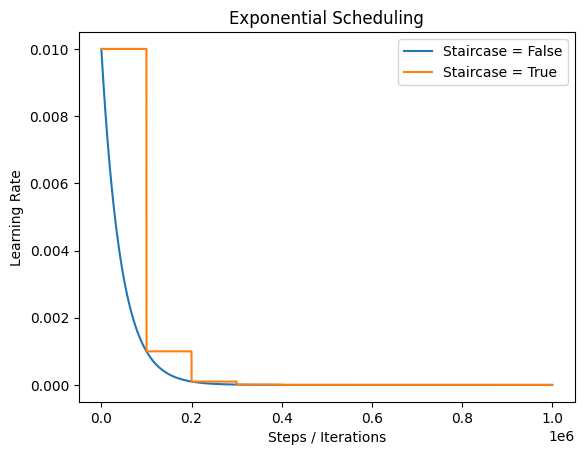

In [18]:
# Modified Value of Decay Rate for Exponential Scheduling
decay_rate = 0.1

# Calculating the Values of the Learning Rate
lr = initial_learning_rate * decay_rate ** (steps / decay_steps)
lr_with_steps = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

# Plotting the Graphs
plt.plot(steps, lr, "-", label="Staircase = False")
plt.plot(steps, lr_with_steps, "-", label="Staircase = True")

# Plot Anatomy
plt.xlabel("Steps / Iterations")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling")
plt.legend()
plt.show()

## Utilising the Keras Callback and the LearningRateScheduler

- The Keras Callback and LearningRateSchedulers can be used to create custom scheduling functions.
- This can be used to create custom scheduling on the basis of each step and on the end of each epoch.

In [19]:
def exponential_decay(initial_learning_rate, steps):
    def exponential_decay_fn(epoch):
        return initial_learning_rate * 0.1 ** (epoch / steps)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(1e-2, 20)

**Learning Rate Scheduler Approach**

In [20]:
# Random State for the Model
tf.random.set_seed(1730)

# Buidling the Model
model = build_model()

# Compiling the Model
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="sgd"
)

# Applying the Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Training the Model
model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler],
    epochs=20
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7078 - loss: 0.8632 - val_accuracy: 0.8444 - val_loss: 0.4228 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8385 - loss: 0.4554 - val_accuracy: 0.8556 - val_loss: 0.3861 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.3940 - val_accuracy: 0.8632 - val_loss: 0.3707 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8735 - loss: 0.3561 - val_accuracy: 0.8626 - val_loss: 0.3641 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8838 - loss: 0.3274 - val_accuracy: 0.8660 - val_loss: 0.3605 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.3043 - val_accuracy: 0.8666 - val_loss: 0.3615 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - l

## Piecewise Constant Scheduling

- In piecewise constant scheduling we utilise a number of preset learning rate for a fixed number of epochs during training
- Thus, it works as follows:
    - $\alpha_0$ for $n_1$ no of epochs
    - $\alpha_1$ for $n_2$ no of epochs
    - $\alpha_2$ for $n_3$ no of epochs
    - And so on ...
    
    
- Although alot of tuning needs to be done to finalise on the number of epochs and learning rates for the each epoch for good outputs using this approach

In [21]:
# Creating the Piecewise Schdule
lr_piecewise_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[30e3, 50e3, 80e3],
    values=[5e-2, 1e-2, 5e-3, 1e-3]
)

# Applying the Learning Rate Schedule to the Model
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr_piecewise_schedule
)

# Training the Model
history_piecewise_scheduling = compile_and_train_model(optimizer)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7691 - loss: 0.6646 - val_accuracy: 0.8584 - val_loss: 0.3739
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8560 - loss: 0.3941 - val_accuracy: 0.8708 - val_loss: 0.3478
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8774 - loss: 0.3331 - val_accuracy: 0.8712 - val_loss: 0.3491
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2930 - val_accuracy: 0.8702 - val_loss: 0.3562
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.2593 - val_accuracy: 0.8792 - val_loss: 0.3601
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9170 - loss: 0.2324 - val_accuracy: 0.8740 - val_loss: 0.3812
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2089 - val_accuracy: 0.8718 - val_loss: 0.4026
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9313 - loss: 0.1901 - 

## Visualing Piecewise Scheduling of Learning Rate

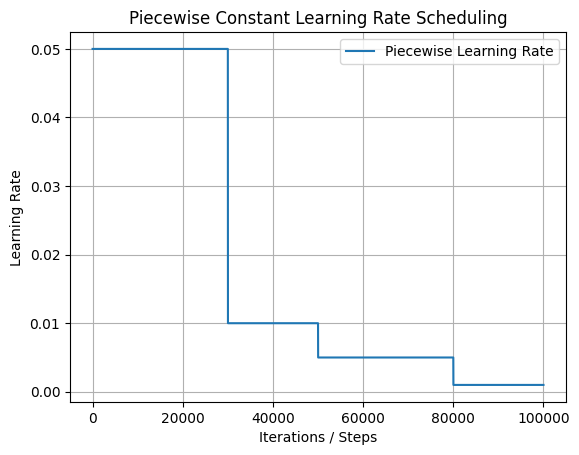

In [22]:
# Parameters of Piecewise Scheduling
boundaries = [30e3, 50e3, 80e3]
values = [5e-2, 1e-2, 5e-3, 1e-3]

# Steps for X - Axis
steps = np.arange(100e3)

# Learning Rate Array
lrs = np.full(len(steps), values[0])

# print(lrs.shape)
# print(lrs[:10])
# for i, j in zip(boundaries, values[1:]):
#     print(i, j)
#     print(lrs[int(i)])

for boundary, value in zip(boundaries, values[1:]):
    # Updating the values of Learning Rate after a certain boundary
    lrs[int(boundary):] = value
    
plt.plot(steps, lrs, "-", label="Piecewise Learning Rate")
plt.title("Piecewise Constant Learning Rate Scheduling")
plt.xlabel("Iterations / Steps")
plt.ylabel("Learning Rate")
plt.grid()
plt.legend()
plt.show()

**Applying Piecewise Constant Learning Rate Scheduling using the Keras LearningRateScheduler Approach**

In [23]:
def piecewise_constant(boundaries, values):
    
    # Converting the List to Numpy Arrays
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    
    def piecewise_const_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    
    # Returning the Configured Function for Learning Rate Scheduling
    return piecewise_const_fn

# Creating the Function to be used by the Scheduler
piecewise_const_fn = piecewise_constant(
    [5, 10, 15], 
    [5e-2, 1e-2, 5e-3, 1e-3]
)

In [24]:
boundaries = np.array([0, 5, 10, 15])
print(boundaries)

for i in [3, 7, 13, 20]:
    print(values[(boundaries > i).argmax() - 1])

[ 0  5 10 15]
0.05
0.01
0.005
0.001


In [25]:
n_epochs = 25 

# Applying the Schedule to Keras Callback
lr_piecewise_schedule = tf.keras.callbacks.LearningRateScheduler(piecewise_const_fn)

# Building the Model
model = build_model()
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)
)

# Training the Model
history_piecewise_scheduling_epoch = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=n_epochs,
    callbacks=[lr_piecewise_schedule]
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7681 - loss: 0.6623 - val_accuracy: 0.8598 - val_loss: 0.3833 - learning_rate: 0.0500
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8554 - loss: 0.3967 - val_accuracy: 0.8676 - val_loss: 0.3555 - learning_rate: 0.0500
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8787 - loss: 0.3352 - val_accuracy: 0.8702 - val_loss: 0.3444 - learning_rate: 0.0500
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8925 - loss: 0.2944 - val_accuracy: 0.8708 - val_loss: 0.3528 - learning_rate: 0.0500
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9052 - loss: 0.2606 - val_accuracy: 0.8752 - val_loss: 0.3591 - learning_rate: 0.0500
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9199 - loss: 0.2209 - val_accuracy: 0.8826 - val_loss: 0.3484 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9316 - l

## Performance Learning Rate Scheduling

- Performance Learning Rate Scheduling works by decay the learning rate by monitoring the values of Validation Loss during the Training Process.
- It thus measures the values of validation loss for every N epochs / steps
- After the N epochs / steps it reduces the learning rate by a factor $\lambda$

In [26]:
# Building the Model
model = build_model()
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)
)

# Creating the Learning Rate Schedule
lr_performance_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=5
)

# Traning the Model
history_performance_schedule = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=n_epochs,
    callbacks=[lr_performance_schedule]
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7151 - loss: 0.8465 - val_accuracy: 0.8440 - val_loss: 0.4232 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8416 - loss: 0.4491 - val_accuracy: 0.8588 - val_loss: 0.3861 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8633 - loss: 0.3834 - val_accuracy: 0.8640 - val_loss: 0.3751 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8791 - loss: 0.3424 - val_accuracy: 0.8676 - val_loss: 0.3680 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8899 - loss: 0.3113 - val_accuracy: 0.8662 - val_loss: 0.3682 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.2846 - val_accuracy: 0.8706 - val_loss: 0.3703 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9104 - l

## Visualising Performance Learning Rate Scheduling

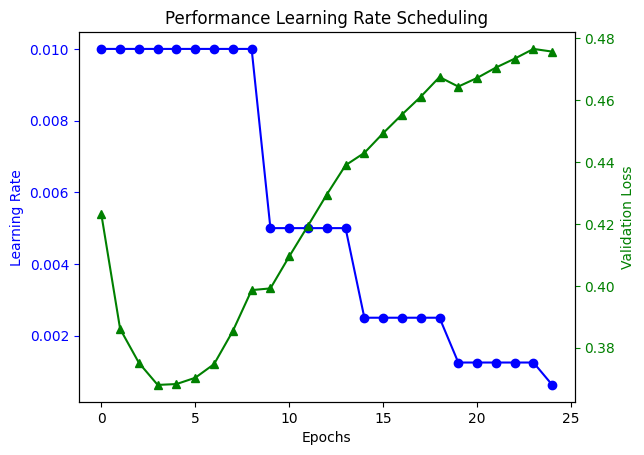

In [27]:
# Plotting the Trends in the Learning Rate
plt.plot(range(n_epochs), history_performance_schedule.history["learning_rate"], "bo-")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate", color="b")
plt.tick_params("y", colors="b")

# Plotting the Trends in the Validation Loss
alt_axes = plt.gca().twinx()
alt_axes.plot(range(n_epochs), history_performance_schedule.history["val_loss"], "g^-")
alt_axes.set_ylabel("Validation Loss", color="g")
alt_axes.tick_params("y", colors="g")

plt.title("Performance Learning Rate Scheduling")
plt.show()

In [28]:
history_performance_schedule.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

**Avoiding Overfitting Through Regularization**
--

## L1 Regularization

$$l_1 \; = \; \sum_{i \; = \; 1}^m \; | \; x^{<i>} \; |$$
- It is more robust to outliers.
- It isnt easily differentiable.
- It promotes sparsity.

## L2 Regularization

$$l_2 \; = \; \sqrt{\sum_{i \; = \; 1}^m \; | \; {x^{<i>}}^2 \; |}$$
- It is more sensitive to outliers.
- It is easily differentiable.

In [29]:
dense1 = tf.keras.layers.Dense(
    units=100, 
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l1(0.01)
)

dense2 = tf.keras.layers.Dense(
    units=100, 
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
)

print(dense1)
print(dense2)

<Dense name=dense_70, built=False>
<Dense name=dense_71, built=False>


**Alternate Approach to Reduce Code Repetition**

In [30]:
from functools import partial

# Creating a custom wrapper to add only differentiable parameters
RegularizedDense = partial(
    tf.keras.layers.Dense, 
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01)
)

# Building the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    tf.keras.layers.BatchNormalization(),
    RegularizedDense(100),
    tf.keras.layers.BatchNormalization(),
    RegularizedDense(10, activation="softmax")
])

# Compiling the Model
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)
)

# Training the Model
history_alternate_model = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=n_epochs,
    callbacks=[lr_piecewise_schedule]
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7815 - loss: 5.6502 - val_accuracy: 0.8286 - val_loss: 1.2371 - learning_rate: 0.0500
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8130 - loss: 1.0688 - val_accuracy: 0.8240 - val_loss: 0.7797 - learning_rate: 0.0500
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8164 - loss: 0.7288 - val_accuracy: 0.8124 - val_loss: 0.6915 - learning_rate: 0.0500
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8203 - loss: 0.6656 - val_accuracy: 0.8072 - val_loss: 0.6727 - learning_rate: 0.0500
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8133 - loss: 0.6586 - val_accuracy: 0.8270 - val_loss: 0.6726 - learning_rate: 0.0500
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8457 - loss: 0.5968 - val_accuracy: 0.8516 - val_loss: 0.5352 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8512 - l

## Dropout Regularization

- During Dropout Regularisation the units in the layers of a neural network are tested against drop rate probability `P`.
- All the units that are kept by the drop rate probability continue the training process for the current step (Iteration).
- Thus for each iteration of training a new neural network is (mostly likely) trained, while the weights and parameters are carried forward from the previous iterations.
- This approach to training neural networks is the epitome of creating high cohesion, low coupling models.
- Although, due to the sudden drop in units during training the model takes longer to achieve convergence.

**Important**
- If the model is overfitting to a training set we increase the drop rate
- If the model is underfitting to a training set we decrease the drop rate
- Since this approach regularizes the network by firing alternate neurons to reach a desired output each units weights increase by 2x.
- Thus we have to correct the values of the weights by multiply it by the Probability `1 - P` to achieve desired performance.

**Extra**
- To utilise dropout regularization in SELU Activated Neural Networks we need to used the **`Alpha Dropout Layer`**

In [31]:
# Building the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    RegularizedDense(100),
    tf.keras.layers.Dropout(rate=0.2),
    RegularizedDense(100),
    tf.keras.layers.Dropout(rate=0.2),
    RegularizedDense(100),
    tf.keras.layers.Dropout(rate=0.2),
    RegularizedDense(10, activation="softmax")
])

# Compiling the Model
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam()
)

# Training the Model
history_dropout = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=n_epochs,
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6796 - loss: 3.9862 - val_accuracy: 0.8092 - val_loss: 0.8966
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7859 - loss: 0.9662 - val_accuracy: 0.8162 - val_loss: 0.8285
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7878 - loss: 0.9354 - val_accuracy: 0.8168 - val_loss: 0.8093
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7901 - loss: 0.9183 - val_accuracy: 0.8088 - val_loss: 0.8166
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7885 - loss: 0.9042 - val_accuracy: 0.8154 - val_loss: 0.7992
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7907 - loss: 0.8935 - val_accuracy: 0.8186 - val_loss: 0.7793
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7953 - loss: 0.8841 - val_accuracy: 0.8130 - val_loss: 0.7846
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7926 - loss: 0.8784 -

In [32]:
# Model Performance on the Training Set after removing Dropout
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8241 - loss: 0.7513


[0.7530434727668762, 0.8223817944526672]

In [33]:
# Model Performance on the Test Set after Training
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.7789


[0.7869631052017212, 0.8098999857902527]

In [34]:
ls = []
for i in range(21):
    if i % 10 == 0 and i != 0:
        ls.append(np.arange(i - 9, i + 1))
        
ls = np.array(ls)
print(ls)

print(ls.mean(axis=0).shape)
print(ls.mean(axis=1).shape)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]
(10,)
(2,)


## Working with Monte-Carlo Dropout

- For MC Dropout we take a sample of predictions from the Neural Network for the Test Cases using the training configuration of the neural network with the dropout layers.
- The samples are then stacked together and taken a mean for along the first axis.
- This provides an array equalivalent to a single prediction while having considered n samples.

In [35]:
# Taking Samples of the Test Set
y_probas = np.stack(
    [model(X_test, training=True) for sample in range(100)]
)

# Taking a mean of all the samples along the first axis
y_proba = y_probas.mean(axis=0)

In [36]:
# Making a Prediction
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.199, 0.   , 0.047, 0.004,
        0.748]], dtype=float32)

In [37]:
# Comparing the Predictions for the Instance made using Dropout
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.002, 0.   , 0.262, 0.   , 0.062, 0.007,
       0.665], dtype=float32)

In [38]:
# Comparing the Predictions made by the model over different samples for the same instance
y_probas[:10, :1].round(2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.17, 0.03, 0.42]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.04, 0.  , 0.73]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.42, 0.  , 0.1 , 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.03, 0.  , 0.73]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.02, 0.  , 0.52]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.07, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.07, 0.02, 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.08, 0.01, 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.03, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.  , 0.02, 0.  , 0.61]]],
      dtype=float32)

In [39]:
# Checking the Standard Deviation over different samples for the same instance
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.001, 0.   , 0.   , 0.004, 0.001, 0.185, 0.001, 0.042, 0.011,
       0.199], dtype=float32)

In [40]:
# Checking the Target
y_pred_instance = y_proba[0].argmax()
print("Class Predicted: ", class_names[y_pred_instance])
print("Target Class: ", class_names[y_test[0]])

Class Predicted:  Ankle boot
Target Class:  Ankle boot


In [41]:
# Calculating the Performance
# Here the Aggregation is done Column-Wise for every row get the Maximum Value class for each instance
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.8105


**Inference**
- After 100 Monte-Carlo simulations the model has a improvement of about 1% in accuracy
- The number of Monte-Carlo simulations is also a hyperparameter while training the model

## Utilising the MC Dropout Class

- This class is created to utilise the keras dropout layers while overriding the call() to suit the needs of Monte Carlo Dropout.
- Instances of this class can be directly included as layers in the model.

In [42]:
# Dropout Model Architecture
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,404 (1.17 MB)

 Trainable params: 101,278 (395.62 KB)

 Non-trainable params: 1,568 (6.12 KB)

 Optimizer params: 202,558 (791.25 KB)

In [43]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

# Building the Model with Monte-Carlo Dropout Layers
dropout_model = tf.keras.models.Sequential([
    MCDropout(layer.rate) if isinstance(layer, tf.keras.layers.Dropout) else layer for layer in model.layers 
])

# Applying the Weights from the Dropout Regularized model
dropout_model.set_weights(model.get_weights())

# Model Summary
dropout_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_3 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,846 (401.74 KB)

 Trainable params: 101,278 (395.62 KB)

 Non-trainable params: 1,568 (6.12 KB)

In [44]:
# Checking for Layers which are Dropout Layers to retrieve the Drop Rate
for layer in model.layers:
    print(layer.rate if isinstance(layer, tf.keras.layers.Dropout) else layer)

<Flatten name=flatten_15, built=True>
<BatchNormalization name=batch_normalization_72, built=True>
0.2
<Dense name=dense_75, built=True>
0.2
<Dense name=dense_76, built=True>
0.2
<Dense name=dense_77, built=True>
0.2
<Dense name=dense_78, built=True>


In [45]:
# Sampling without Training
y_probas = np.mean([
    dropout_model.predict(X_test[:1]) for sample in range(100)
], axis=0).round(2)

print("Class-wise predictions\n", y_probas)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

In [46]:
# Verifying the Predictions
y_pred = y_probas.argmax()
print("Predicted Class: ", class_names[y_pred])
print("Target Class: ", class_names[y_test[0]])

Predicted Class:  Ankle boot
Target Class:  Ankle boot


## Max Norm Regularization

- Is a regularization technique that rescales any / all weights in the layers of a neural network to be within / less than a preset value r.
- Weights of the Neural Network always satisfy the constraint:
$$|| \; w \; ||_2 \; \leq \; r$$

- Here:
    - || . || is the $l_2$ norm
    - r is the regularization hyperparameter
    
**Important**
- Max-Norm loss doesnt contribute to the overall loss function to be evaluated during backpropagation
- At each step of training when the forementioned constraint isnt met the weights are rescaled to meet the constraint

In [47]:
# Applying Max-Norm in Keras
max_norm_layer = tf.keras.layers.Dense(
    units=100,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

print(max_norm_layer)

<Dense name=dense_79, built=False>


In [48]:
# Creating an instance of the Partial Object
MaxNormDenseLayer = partial(
    tf.keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

# Building the Model
final_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    MaxNormDenseLayer(500),
    MaxNormDenseLayer(300),
    MaxNormDenseLayer(100),
    tf.keras.layers.Dense(10, activation="softmax")
])

final_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam()
)

# Training the Model
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=n_epochs
)

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7904 - loss: 0.5849 - val_accuracy: 0.8556 - val_loss: 0.3866
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8533 - loss: 0.3932 - val_accuracy: 0.8628 - val_loss: 0.3769
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8647 - loss: 0.3609 - val_accuracy: 0.8628 - val_loss: 0.3848
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3462 - val_accuracy: 0.8654 - val_loss: 0.3842
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3388 - val_accuracy: 0.8664 - val_loss: 0.3644
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.3293 - val_accuracy: 0.8636 - val_loss: 0.3874
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.3237 - val_accuracy: 0.8640 - val_loss: 0.3939
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8800 - loss: 0.3181 -

**Fin ✨**
--

## I had a lot of fun working on this notebook 📕
## Hope you had just as much fun reading through it and found it insightful 🙃
## Cheers for the read 🙂!!